In [2]:
#Importar librerias basicas
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df= pd.read_csv('boston.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
#Variables independientes, variable dependientes
X_Boston = df.drop('price',axis=1)
y = df['price']

In [8]:
print(X_Boston.shape)
print(y.shape)


(506, 13)
(506,)


In [9]:
# atributos
X_Boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

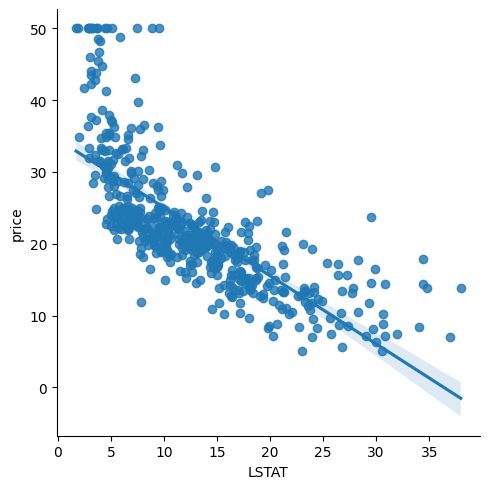

In [12]:
# Grafica de regresion
sns.lmplot(x='LSTAT',y='price',data=df)

In [14]:
cor_col=['CRIM', 'INDUS', 'NOX', 'RM', 'AGE','LSTAT','price']

In [16]:
df2 = df[cor_col]
cormat = df2.corr()
print(cormat)

           CRIM     INDUS       NOX        RM       AGE     LSTAT     price
CRIM   1.000000  0.406583  0.420972 -0.219247  0.352734  0.455621 -0.388305
INDUS  0.406583  1.000000  0.763651 -0.391676  0.644779  0.603800 -0.483725
NOX    0.420972  0.763651  1.000000 -0.302188  0.731470  0.590879 -0.427321
RM    -0.219247 -0.391676 -0.302188  1.000000 -0.240265 -0.613808  0.695360
AGE    0.352734  0.644779  0.731470 -0.240265  1.000000  0.602339 -0.376955
LSTAT  0.455621  0.603800  0.590879 -0.613808  0.602339  1.000000 -0.737663
price -0.388305 -0.483725 -0.427321  0.695360 -0.376955 -0.737663  1.000000


<Axes: >

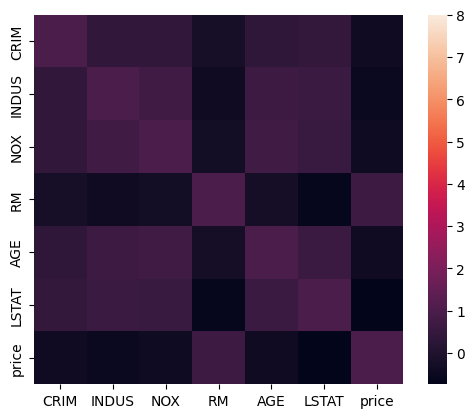

In [17]:
sns.heatmap(cormat,vmax=8,square=True)

In [19]:
grid_columns=['RM', 'AGE','LSTAT','price']
df3 = df[grid_columns]

array([[<Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='AGE', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>,
        <Axes: xlabel='price', ylabel='RM'>],
       [<Axes: xlabel='RM', ylabel='AGE'>,
        <Axes: xlabel='AGE', ylabel='AGE'>,
        <Axes: xlabel='LSTAT', ylabel='AGE'>,
        <Axes: xlabel='price', ylabel='AGE'>],
       [<Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='AGE', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>,
        <Axes: xlabel='price', ylabel='LSTAT'>],
       [<Axes: xlabel='RM', ylabel='price'>,
        <Axes: xlabel='AGE', ylabel='price'>,
        <Axes: xlabel='LSTAT', ylabel='price'>,
        <Axes: xlabel='price', ylabel='price'>]], dtype=object)

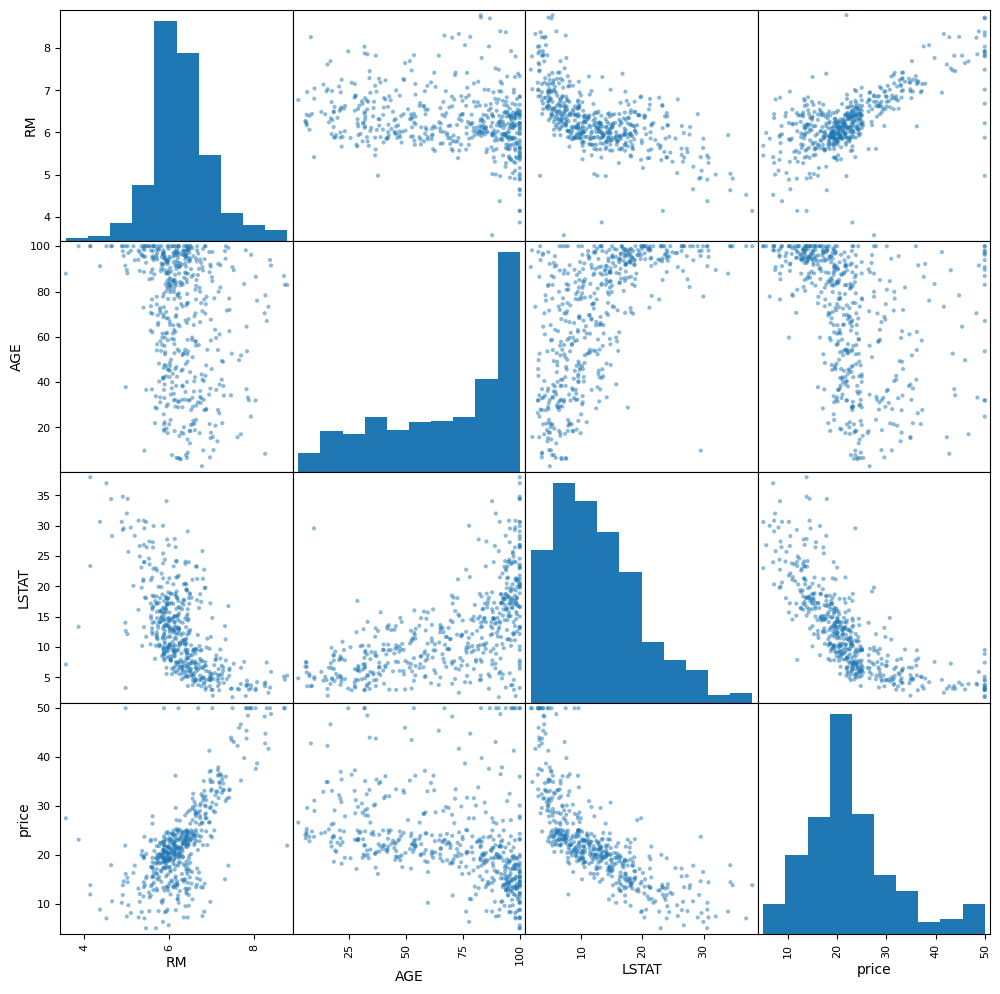

In [22]:
pd.plotting.scatter_matrix(df3,figsize=(12.0,12.0))

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [24]:
# Crear datos de entrenamiento y prueba
X_train,X_test,y_train,y_test = train_test_split(X_Boston,y,test_size=0.2,random_state=0)


In [25]:
# Modelo de regresion
regr = LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

In [27]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

In [33]:
print('Coeficientes y intercepto',regr.coef_,regr.intercept_)
print('Puntaje de entrenamiento' ,r2_score(y_train,y_train_pred))
print('Puntaje de prueba' ,r2_score(y_test,y_test_pred))
print('MSE de entrenamiento' ,mean_squared_error(y_train,y_train_pred))
print('MSE de Prueba' ,mean_squared_error(y_test,y_test_pred))

Coeficientes y intercepto [-1.19443447e-01  4.47799511e-02  5.48526168e-03  2.34080361e+00
 -1.61236043e+01  3.70870901e+00 -3.12108178e-03 -1.38639737e+00
  2.44178327e-01 -1.09896366e-02 -1.04592119e+00  8.11010693e-03
 -4.92792725e-01] 38.091694926302296
Puntaje de entrenamiento 0.7730135569264234
Puntaje de prueba 0.5892223849182525
MSE de entrenamiento 19.326470203585725
MSE de Prueba 33.44897999767639


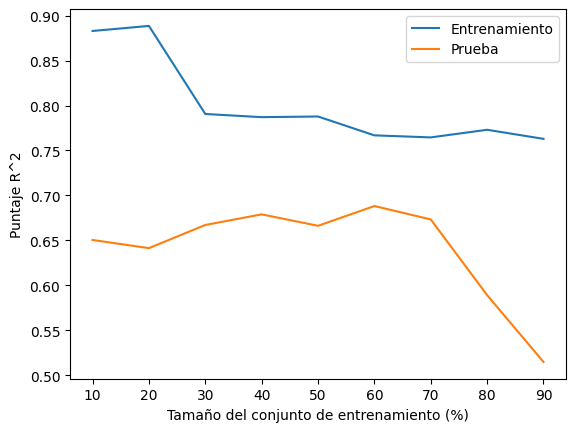

In [35]:
train_scores=[]
test_scores=[]
train_mse=[]
test_mse=[]

for train_size in range(10,100,10):
    X_train,X_test,y_train,y_test=train_test_split(X_Boston,y,test_size=1-train_size/100,random_state=0)
    scaler = StandardScaler()
    X_train_norm = scaler.fit_transform(X_train)
    X_test_norm = scaler.transform(X_test)
    modeln=LinearRegression()
    modeln.fit(X_train_norm,y_train)
    #Calculamos y almacenamos el MSE y r2 para el conjunto de entrenamiento y el conjunto de prueba
    train_mse.append(mean_squared_error(y_train,modeln.predict(X_train_norm)))
    test_mse.append(mean_squared_error(y_test,modeln.predict(X_test_norm)))
    train_scores.append(r2_score(y_train,modeln.predict(X_train_norm)))
    test_scores.append(r2_score(y_test,modeln.predict(X_test_norm)))

import matplotlib.pyplot as plt
plt.plot(range(10,100,10), train_scores, label='Entrenamiento')
plt.plot(range(10,100,10), test_scores, label='Prueba')
plt.xlabel('Tamaño del conjunto de entrenamiento (%)')
plt.ylabel('Puntaje R^2')
plt.legend()
plt.show()

In [36]:
from sklearn.linear_model import Lasso

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X_Boston,y,test_size=0.2,random_state=0)


In [38]:
regr_lasso = Lasso(alpha=0.3)
regr_lasso.fit(X_train,y_train)

Lasso(alpha=0.3)

In [39]:
y_train_pred_lasso = regr_lasso.predict(X_train)
y_test_pred_lasso = regr_lasso.predict(X_test)


In [40]:
print('Coeficientes y intercepto',regr_lasso.coef_,regr_lasso.intercept_)
print('Puntaje de entrenamiento' ,r2_score(y_train,y_train_pred_lasso))
print('Puntaje de prueba' ,r2_score(y_test,y_test_pred_lasso))
print('MSE de entrenamiento' ,mean_squared_error(y_train,y_train_pred_lasso))
print('MSE de Prueba' ,mean_squared_error(y_test,y_test_pred_lasso))

Coeficientes y intercepto [-0.10091549  0.04933569 -0.02898803  0.         -0.          2.95699545
 -0.00562824 -1.00232198  0.21156723 -0.01350856 -0.8939577   0.00870808
 -0.57432034] 32.35733363477465
Puntaje de entrenamiento 0.7563145013524987
Puntaje de prueba 0.547182444936144
MSE de entrenamiento 20.748289919368773
MSE de Prueba 36.87222668867542


In [42]:
ind = np.argsort(np.abs(regr_lasso.coef_))
ind

array([ 3,  4,  6, 11,  9,  2,  1,  0,  8, 12, 10,  7,  5])